# Titanic - Unsupervised Learning


The objective is to practice k-means clustering. Last week, we used supervised classification to understand what drives survivability. This week we explore whether the machine can figure it out on it's own.

Get the titanic3.csv data (Source: Link).

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns

In [188]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [189]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [190]:
%matplotlib inline

In [191]:
raw = pd.read_csv("titanic3.csv")

In [192]:
tc = raw.copy()

## Description of the dataset

Each row is a passenger on the Titanic. The columns report attributes for the passengers:

| Column | Description | Relevant for this homework|
|--------|-------------|--------|
|`survived`|1 = survived, 0 = died | **X**|
|`pclass`| 1 = first class, 2 = second class, 3 = third class |**X**|
|`name`| Name of the passenger| |
|`sex`| male or female|**X**|
|`age`| age in years|**X**|
|`sibsp`| The number of siblings or spouses that are also traveling on the Titanic|**X**|
|`parch`| The number of parents or childen that are also traveling on the Titanic|**X**|
|`ticket`|The ticket number| |
|`fare`| The ticket price | |
|`cabin`| The cabin number | |
|`embarked`| The starting city | |
|`boat`| The emergency boat number | |
|`body`| The identification number of the body | |
|`home.dest`| The destination of the passenger | |

## Analyze the data using pandas.


Created a column called child and set it to Adult when the age is greater than 9 and Child when age is not greater than 9 (implies lesser or equal to 10)

In [215]:
tc['child'] = np.where(tc['age'] > 9, 'Adult', 'Child')

Here we add the number of siblings, parents and children and set the column called family_size

In [216]:
tc['family_size'] = tc['sibsp']+tc['parch'] +1.0

## Clusters for the dataset.

Impute is a function that replaces a missing_value parameter and replaces it with the strategy. In this case the strategy is mean, so the Nan values are replaced by the median of the whole data. I check if there are age with values NaN. I see that there are. And after the impute and transform, there are no more age values of NaN

Reference: 
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html


In [217]:
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values="NaN", strategy="median" )
imp.fit(tc[["age"]])
tc["age"]=imp.transform(tc[["age"]]).ravel()

print ("After imputing are there any rows with age not defined :")
print (np.isnan(tc['age']).any())

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

After imputing are there any rows with age not defined :
False


### Drop all remaining NaN values.
I drop columns that are either NaN or Null. I first check if there such rows and it can be seen that there was 1 row that has this.  Now the total number of rows is 1309 (1 less than 1310)

### Preprocess the sex column using LabelEncoder.
Label encoder encodes the values of a column as [0,1,2...] Female -> 0. Male -> 1

In [218]:
le = pp.LabelEncoder()
tc["sex"]=le.fit_transform(tc["sex"].astype(str))

print ("Total number of rows")
print (len(tc.axes[0]))

tc_rel = tc[['survived', 'sex','pclass','child','age','family_size']]

tc_rel = tc_rel.dropna()

print ("Total number of rows after NaN values are removed")
print (len(tc_rel.axes[0]))

Total number of rows
1310
Total number of rows after NaN values are removed
1309


### Preprocess the child column using LabelEncoder (not actually necessary but for systematic purposes).
Label encoder encodes the values of a column as [0,1,2...] Adult - 0. Child - 1

Reference: 
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [219]:
le = pp.LabelEncoder()
tc_rel["child"]=le.fit_transform(tc_rel["child"].astype(str))

In [220]:
tc_rel.drop(['survived'], axis=1, inplace=True)

### Scale the data set to standardize the dataset using sklearn.preprocessing.scale
If there are mixed data, where each attribute is something entirely different like age, gender, then these values aren't really comparable and therefore standardizing them is good to do to give equal weight to them.

Reference: 
* https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering

In [240]:
tc_scale = pd.DataFrame(pp.scale(tc_rel, axis=1))
#tc_scale = pp.scale(tc_rel)

### Pick an appropriate number of clusters.
One way to pick a the number of cluster is to run the Kmeans many times and find out using silhoutte score. That is done below. Here I use something called elbow method where I plot the kmeans fit for each cluster value from 1 to 7. The graph shows that there is a steep decline in the variance for clusters 1 to 3, so I picked 2.

Reference: 
* https://www.datascience.com/blog/k-means-clustering
* https://medium.com/@iSunilSV/data-science-python-k-means-clustering-eed68b490e02

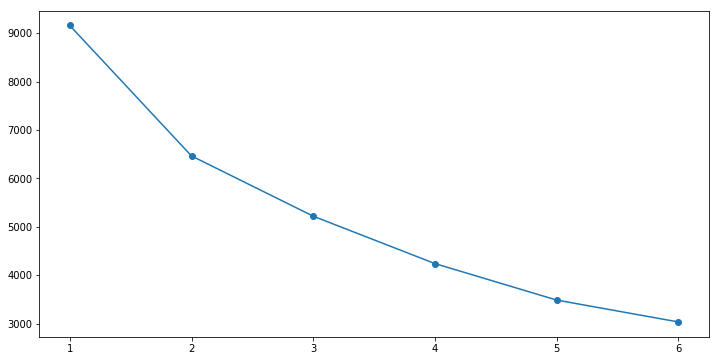

In [222]:
cluster_range = range( 1, 7)
#cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit(tc_scale)### Run a KMeans cluster analysis.
  #cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
#clusters_df[0:7]

plt.figure(figsize=(12,6));
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

### Run a KMeans cluster analysis.
The kmeans uses the scaled data to fit and also returns the labels and centroids. I use the scatter plot to plot the data as well as the cneters of the clusters. I use the subplot to view the grpahs next to each other. And the 3d plots to include multiple features

Reference: 
* https://pythonspot.com/3d-scatterplot/
* https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/



In [237]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(tc_scale)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

y_kmeans = kmeans.predict(tc_scale);

#print(centroids)
#print(labels)
#print(y_kmeans)

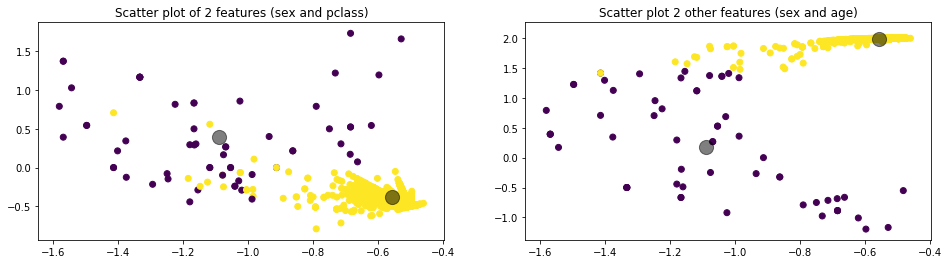

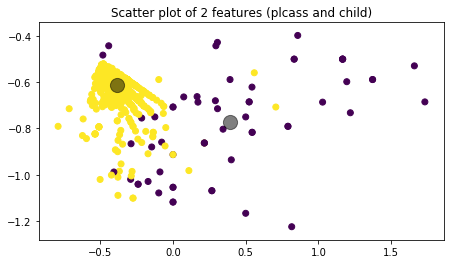

In [238]:
fig = plt.figure(figsize=plt.figaspect(.25))
ax = fig.add_subplot(1, 2, 1,title="Scatter plot of 2 features (sex and pclass)")
ax.scatter(tc_scale.iloc[:, 0], tc_scale.iloc[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


ax = fig.add_subplot(1, 2, 2 ,title="Scatter plot 2 other features (sex and age)")
ax.scatter(tc_scale.iloc[:, 0], tc_scale.iloc[:, 3], c=y_kmeans)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 3], c='black', s=200, alpha=0.5);

fig = plt.figure(figsize=plt.figaspect(.25))
ax = fig.add_subplot(1, 2, 1,title="Scatter plot of 2 features (plcass and child)")
ax.scatter(tc_scale.iloc[:, 1], tc_scale.iloc[:, 2], c=y_kmeans)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

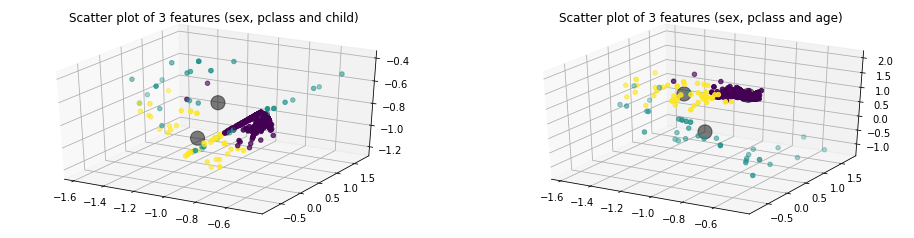

In [232]:
fig = plt.figure(figsize=plt.figaspect(.25))
ax = fig.add_subplot(1, 2, 1, projection='3d',title="Scatter plot of 3 features (sex, pclass and child)")
ax.scatter(tc_scale.iloc[:, 0], tc_scale.iloc[:, 1], tc_scale.iloc[:, 2], c=y_kmeans)
#ax.scatter(tc_scale[:], c=y_kmeans)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);


ax = fig.add_subplot(1, 2, 2, projection='3d',title="Scatter plot of 3 features (sex, pclass and age)")
ax.scatter(tc_scale.iloc[:, 0], tc_scale.iloc[:, 1], tc_scale.iloc[:, 3], c=y_kmeans)
#ax.scatter(tc_scale[:], c=y_kmeans)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 3], c='black', s=200, alpha=0.5);

### Interpret the results

Kmeans clustering is for unlabeled data. In this case, we do know the labels but we can pretend that we do not know the labels for the dataset and run the kmeans for this. Using clusters as 2 we plot it in a scatter graph showing two of the data features in a 2d graph and three of the features using the 3d graph.  You can see the two clusters that they are pretty distinct. And the two dots are the two centroids of the two clusters.

Though the kmeans doesnt know labels, but in this case of the titanic data we know the labels and can use the survived as a column. We can compare the clustering against this and check the accuracy.

But even if we do not use any of the labels, we see two distinct clusters. 

Reference:
* https://codeahoy.com/2017/02/19/cluster-analysis-using-k-means-explained/
* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html


## Search for the best number of clusters using the silhouette score from sklearn.metrics.



#### What is silhoutte score?

It is the measure of how similar an object is to its cluster. Closer to 1 is very similar and closer to 0, the object is not similar to the cluster.

### Setting the parameters to 2,3,4,5,6 clusters.
Here I run the kmeans for clusters as 2,3,4,5,6. I use the subplot so I can view the graphs side by side. 

Reference:
* https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/

In [233]:


from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(tc_scale)
y_kmeans2 = kmeans2.predict(tc_scale);

kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(tc_scale)
y_kmeans3 = kmeans3.predict(tc_scale);

kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(tc_scale)
y_kmeans4 = kmeans4.predict(tc_scale);

kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(tc_scale)
y_kmeans5 = kmeans5.predict(tc_scale);

kmeans6 = KMeans(n_clusters=6)
kmeans6.fit(tc_scale)
y_kmeans6 = kmeans6.predict(tc_scale);




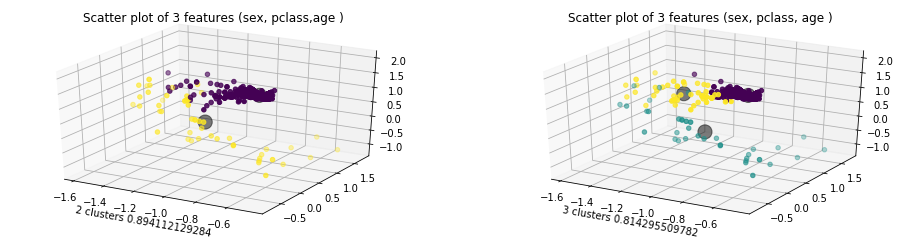

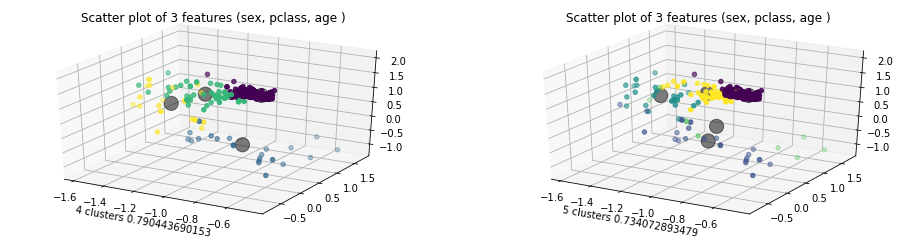

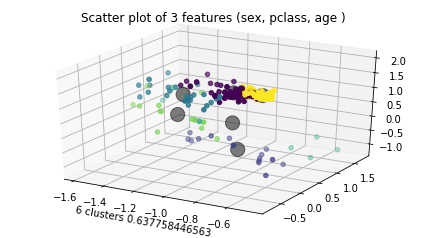

In [235]:
#fig, axes = plt.subplots(nrows=2, ncols=3)
from sklearn.metrics import silhouette_score

fig = plt.figure(figsize=plt.figaspect(.25))

silhouette_avg2 = silhouette_score(tc_scale, y_kmeans2)
label = "2 clusters " + str(silhouette_avg2)
ax = fig.add_subplot(1, 2, 1, projection='3d',xlabel=label,title="Scatter plot of 3 features (sex, pclass,age )")
ax.scatter(tc_scale.iloc[:, 0], tc_scale.iloc[:, 1], tc_scale.iloc[:, 3], c=y_kmeans2)
centers2 = kmeans2.cluster_centers_
ax.scatter(centers2[:, 0], centers2[:, 1], centers2[:, 3], c='black', s=200, alpha=0.5);



silhouette_avg3 = silhouette_score(tc_scale, y_kmeans3)
label = "3 clusters " + str(silhouette_avg3)
ax = fig.add_subplot(1, 2, 2, projection='3d',xlabel=label,title="Scatter plot of 3 features (sex, pclass, age )")
ax.scatter(tc_scale.iloc[:, 0], tc_scale.iloc[:, 1], tc_scale.iloc[:, 3], c=y_kmeans3)
centers3 = kmeans3.cluster_centers_
ax.scatter(centers3[:, 0], centers3[:, 1], centers3[:, 3], c='black', s=200, alpha=0.5);


fig = plt.figure(figsize=plt.figaspect(.25))

silhouette_avg4 = silhouette_score(tc_scale, y_kmeans4)
label = "4 clusters " + str(silhouette_avg4)
ax = fig.add_subplot(1, 2, 1, projection='3d',xlabel=label,title="Scatter plot of 3 features (sex, pclass, age )")
ax.scatter(tc_scale.iloc[:, 0], tc_scale.iloc[:, 1], tc_scale.iloc[:, 3], c=y_kmeans4)
centers4 = kmeans4.cluster_centers_
ax.scatter(centers4[:, 0], centers4[:, 1], centers4[:, 3], c='black', s=200, alpha=0.5);



silhouette_avg5 = silhouette_score(tc_scale, y_kmeans5)
label = "5 clusters " + str(silhouette_avg5)
ax = fig.add_subplot(1, 2, 2, projection='3d',xlabel=label,title="Scatter plot of 3 features (sex, pclass, age ) ")
ax.scatter(tc_scale.iloc[:, 0], tc_scale.iloc[:, 1], tc_scale.iloc[:, 3], c=y_kmeans5)
centers5 = kmeans5.cluster_centers_
ax.scatter(centers5[:, 0], centers5[:, 1], centers5[:, 3], c='black', s=200, alpha=0.5);


fig = plt.figure(figsize=plt.figaspect(.25))

silhouette_avg6 = silhouette_score(tc_scale, y_kmeans6)
label = "6 clusters " + str(silhouette_avg6)
ax = fig.add_subplot(1, 2, 1, projection='3d',xlabel=label,title="Scatter plot of 3 features (sex, pclass, age )")
ax.scatter(tc_scale.iloc[:, 0], tc_scale.iloc[:, 1], tc_scale.iloc[:, 3], c=y_kmeans6)
centers6 = kmeans6.cluster_centers_
ax.scatter(centers6[:, 0], centers6[:, 1], centers6[:, 3], c='black', s=200, alpha=0.5);





### Silhoutte scores 

In [236]:

print("For clusters = 2 ", "The average silhouette score is :", silhouette_avg2)

print("For clusters = 3 ", "The average silhouette score is :", silhouette_avg3)

print("For clusters = 4 ", "The average silhouette score is :", silhouette_avg4)

print("For clusters = 5 ", "The average silhouette score is :", silhouette_avg5)

print("For clusters = 6 ", "The average silhouette score is :", silhouette_avg6)

For clusters = 2  The average silhouette score is : 0.894112129284
For clusters = 3  The average silhouette score is : 0.814295509782
For clusters = 4  The average silhouette score is : 0.790443690153
For clusters = 5  The average silhouette score is : 0.734072893479
For clusters = 6  The average silhouette score is : 0.637758446563


### Interpretation
I have used the 3d scatter to plot the different features. We can use any of the 7 features 'sex','pclass','child','age','family_size','parch','sibsp'. Since this is unsupervised data, we actually do not know the labels. We can just pick any of the tc_scale[:, 0], tc_scale[:, 1] ... tc_scale[:, 6]

Running the elbow method we saw that number of clusters is 2. Even here looking at the silhoutte score we see that the clusters of 2 gives the highest value and therefore the choice of 2 clusters seems to be good. 

But visual inspection of the graph for different number of clusters do not seem to indicate the difference. 

Reference: 
* https://stats.stackexchange.com/questions/10540/how-to-interpret-mean-of-silhouette-plot


### Names for the clusters.

Because we know the labels in this case, we can draw conclusions about the names of the clusters. I notice that the gender seems to affect the clustering. I tried by removing the sex from the analysis.  I would therefore call it "Survived because female" and "Dead because Male"

# Conclusion

Although other factors like pclass, age, etc. contribute to the prediction where a person will survive or not, we can see that clearly gender plays a very important role in the survival rate/prediction.

Unsupervised learning is a very important concept these days, because a lot of technology or actions or work produces millions and millions of data. This data is stored as is and is not made any sense of. But by using unsupervised learning we can clearly cluster and classify (label) data and probably understand, finalize or make predictions.